<a href="https://colab.research.google.com/github/AlanDemostenes/Data-Science-Coderhouse/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstracto (Motivacion y Audiencia)**

La Diabetes es una enfermedad cronica en la cual los individuos pierden la capacidad de regular efectivamente sus niveles de glucosa en sangre, lo que lleva a una reduccion en la calidad y expectativa de vida. Posterior a la digestion, el azucar derivado de la fragmentacion de los alimentos entra en el torrente sanguineo. Esto da una señal al pancreas para liberar insulina, la cual ayuda a las celulas del cuerpo a utilizar esos azucares para generar energia. La Diabetes se caracteriza por imposibilidad de producir la suficiente insulina necesaria para metabolizar ese azucar en sangre o la incapacidad de utilizar la insulina ya existente de manera efectiva.

Complicaciones como enfermedad cardiaca, perdida de la vision, amputacion de miembros inferiores y enfermedad renal se asocian con altos niveles de azucar en sangre sostenidos en el tiempo de manera cronica. Si bien no hay cura para la diabetes, estrategias como la perdida de peso, alimentacion saludable, vida activa y tratamientos farrmacologicos pueden mitigar los perjuicios de esta enfermedad en muchos pacientes. 

La Diabetes esta entre las enfermedades cronicas mas prevalentes del mundo, impactando a millones de personas cada año y demandando una inversion significativa del presupuesto de los paises del mundo. 

El diagnostico temprano puede llevar a cambios en el estilo de vida y tratamientos mas efectivos, haciendo que la creacion de modelos predictivos para el riesgo de diabetes, una herramienta clave para el publico y los agentes de salud de una nacion.

Obtener un modelo predictivo eficaz y confiable permitiria a cualquier nacion aplicar medidas preventivas y terapeuticas disminuyendo el costo de salud del presupuesto anual.

# **Contexto Comercial**

Si se trabajara para el Ministerio de Salud de una nacion (en este caso, EEUU), el sector del departamento que se encarga de la prevencion y manejo de enfermedades cronicas tiene la tarea de investigar causas de incidencia de patologias cronicas (como la obesidad, diabetes, hipertension arterial, dislipemias, entre otras) y tecnicas para disminuir su prevalencia en la poblacion.

Siendo parte de este equipo, se buscaria encontrar la mejor forma de detectar de manera temprana (y certera) a los pacientes con la patologia abordada, prevenir nuevos casos y/o tratar tempranamente a los pacientes afectados para disminuir el impacto de la patologia en la economia del pais.

# **Contexto Analitico**

Se entrega un archivo CSV que contiene los resultados de las evaluaciones de los 253.000+ pacientes, producto del interrogatorio clinico, examen fisico y examenes complementarios. 

Se presentan las variables HighBP (Presion Arterial Elevada); HighCol (Colesterol Elevado); BMI (Indice de Masa Corporal); Smoker (Tabaquismo); PhysActivity (Actividad Fisica); Sex (Sexo); Age (Edad); Income (Ingreso); Education (Educacion); entre otras.

Con el dataset se busca evaluar las relaciones de correlacion y probable causalidad entre distintos factores de riesgo que puedan determinar la presencia de diabetes actual o en un futuro.

# **Objetivo**

Nuestro objetivo sera buscar correlaciones y causalidades entre estas variables, definir un modelo predictivo en el cual ingresando estos datos se pueda predecir con el menor margen de error, la probabilidad de que el paciente tenga diabetes en el presente o en un futuro, para poder incorporar lo mas tempranamente posible, las estrategias para disminuir el riesgo y las comorbilidades, eficazmente disminuyendo el impacto economico de la enfermedad en el pais, asi como definir los factores de riesgo mas prevalentes para poder enfocar recursos en disminuir su prevalencia en la poblacion.

# **Preguntas/Hipotesis** 

Algunas de las preguntas planteadas son las siguientes:

¿Que factores de riesgo son los mas relevantes en la aparicion de la diabetes?
¿Que factores protectores son los mas relevantes en la prevencion de la diabetes?
¿Que combinacion de factores, tanto de riesgo como protectores, tiene mayor relevancia, en la incidencia de diabetes en la poblacion?
¿Se puede utilizar al dia de hoy un set de factores de riesgo para detectar de manera certera si el paciente tiene o tendra diabetes?

# **Problema Comercial**

Generar el EDA del dataset, de la manera mas clara y dinamica posible, para poder responder a las preguntas especificas de la patologia y poder presentar las recomendaciones al sector del Ministerio de Salud encargado de ponerlas en accion.

# **EDA (Exploratory Data Analysis)**

# Importe de Datos

Procedemos a cargar el dataset a estudiar que toma las respuestas de 253680 pacientes evaluados en el CDC (Center of Disease Control and Prevention de los EEUU) del año 2015

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
url ='https://raw.githubusercontent.com/AlanDemostenes/Data-Science-Coderhouse/main/diabetes_binary_health_indicators_BRFSS2015.csv'  
diabetes = pd.read_csv(url,sep=',')
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
diabetes.shape

(253680, 22)

# **Data Wrangling**

## Reemplazo de Valores

Antes de continuar con el EDA, observamos que el Dataset se encuentra codificado en algunos de sus columnas (Por ejemplo, la Edad utiliza una codificacion de numeros para determinados rangos etarios). Para mejorar la lectura y comprension de los graficos, decidimos alterar el dataset original, reemplazandolo por los valores a los que hacen referencia dichas codificaciones

In [ ]:
diabetes2 = diabetes.copy() 
diabetes2.Age.unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [ ]:
diabetes2 = diabetes.copy() 
diabetes2.Age.replace({1 : '18 a 24', 2: '25 a 29', 3: '30 a 34', 4: '35 a 39', 5:'40 a 44', 6: '45 a 49', 7: '50 a 54', 8:'55 a 59', 9:'60 a 64', 10: '65 a 69', 11: '70 a 74', 12: '75 a 79', 13: '>80'}, inplace = True)
diabetes2.Age.unique()

array(['60 a 64', '50 a 54', '70 a 74', '65 a 69', '55 a 59', '>80',
       '35 a 39', '45 a 49', '25 a 29', '75 a 79', '40 a 44', '18 a 24',
       '30 a 34'], dtype=object)

In [ ]:
warnings.filterwarnings('ignore')

diabetes2.GenHlth[diabetes2['GenHlth'] == 5] = '5 - Mala'
diabetes2.GenHlth[diabetes2['GenHlth'] == 4] = '4 - Regular'
diabetes2.GenHlth[diabetes2['GenHlth'] == 3] = '3 - Buena'
diabetes2.GenHlth[diabetes2['GenHlth'] == 2] = '2 - Muy Buena'
diabetes2.GenHlth[diabetes2['GenHlth'] == 1] = '1 - Excelente'

diabetes2.Sex[diabetes2['Sex'] == 0] = 'Femenino'
diabetes2.Sex[diabetes2['Sex'] == 1] = 'Masculino'

diabetes2.Education[diabetes2['Education'] == 1] = 'Nunca fue a la escuela'
diabetes2.Education[diabetes2['Education'] == 2] = 'Primario Incompleto/Completo'
diabetes2.Education[diabetes2['Education'] == 3] = 'Secundario Incompleto'
diabetes2.Education[diabetes2['Education'] == 4] = 'Secundario Completo'
diabetes2.Education[diabetes2['Education'] == 5] = 'Terciario/Universitario Incompleto'
diabetes2.Education[diabetes2['Education'] == 6] = 'Universitario Completo/Doctorado'

diabetes2.Income[diabetes2['Income'] == 1] = '<U$D10,000'
diabetes2.Income[diabetes2['Income'] == 2] = 'U$D10,000-15,000'
diabetes2.Income[diabetes2['Income'] == 3] = 'U$D15,000-20,000'
diabetes2.Income[diabetes2['Income'] == 4] = 'U$D20,000-25,000'
diabetes2.Income[diabetes2['Income'] == 5] = 'U$D25,000-35,000'
diabetes2.Income[diabetes2['Income'] == 6] = 'U$D$35,000-50,000'
diabetes2.Income[diabetes2['Income'] == 7] = 'U$D50,000-75,000'
diabetes2.Income[diabetes2['Income'] == 8] = '>U$D75,000'

Primero debemos identificar que variables del dataset tienen correlacion positiva y relevante para resolver nuestras preguntas e hipotesis. Hacemos un Heatmap para evaluar rapidamente el dataset.

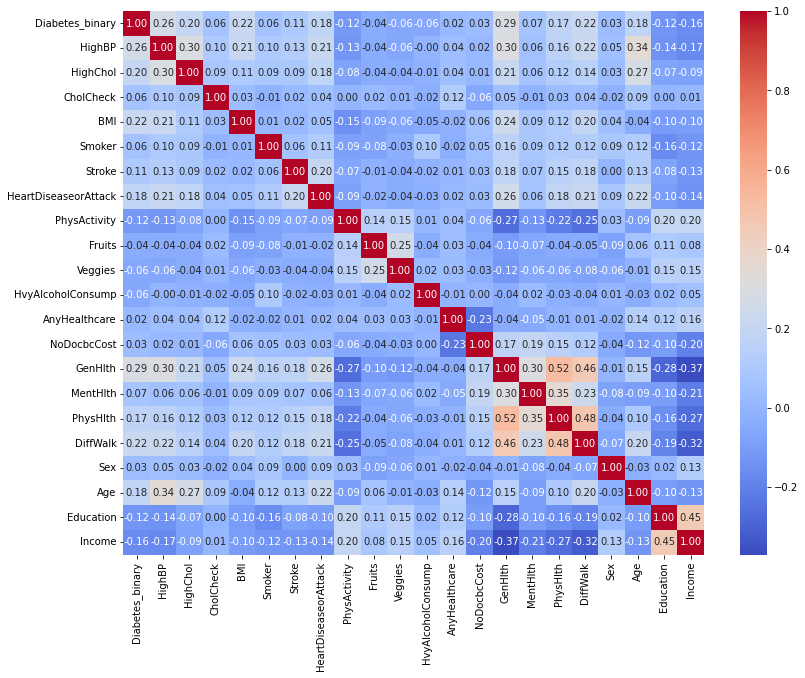

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(diabetes.corr(),annot=True, fmt = ".2f", cmap = "coolwarm");

Comenzamos con el analisis profundo de nuestro dataset, evaluando la cantidad de columnas presentes. Utilizando el Heatmap, sabemos que varias de esas columnas no tienen una relevancia estadistica (correlacion) para el desarrollo de un modelo para el diagnostico de diabetes (como el consumo de frutas, verduras, sexo, posibilidad de asistencia al doctor, frecuencia de chequeos de colesterol y chequeos de salud), por lo que procedemos a eliminarlas

In [ ]:
list(diabetes.columns)

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [ ]:
columnas = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare" , "NoDocbcCost"]
diabetes.drop(columnas , axis= 1 ,inplace=True)
list(diabetes.columns)

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Age',
 'Education',
 'Income']

Continuando con el analisis detallado de nuestro dataset, hacemos un conteo de la variable binaria objetivo y observamos que el dataset no es de tipo balanceado.

In [ ]:
diabetes["Diabetes_binary"].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

Para reducir la dimensionalidad de nuestro dataset procedemos a eliminar los duplicados de nuestro dataset

In [ ]:
diabetes.duplicated().sum()

50028

In [ ]:
diabetes.drop_duplicates(inplace = True)
diabetes.duplicated().sum()

0

En el caso de que quisieramos seguir reduciendo la dimensionalidad podriamos eliminar tambien los nulls de la siguiente manera:

In [ ]:
diabetes.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
dtype: int64

En nuestro caso, vemos que no tenemos datos Nulos por lo que no es necesario depurar el dataset

Procedemos a chequear los Outliers de nuestro dataset

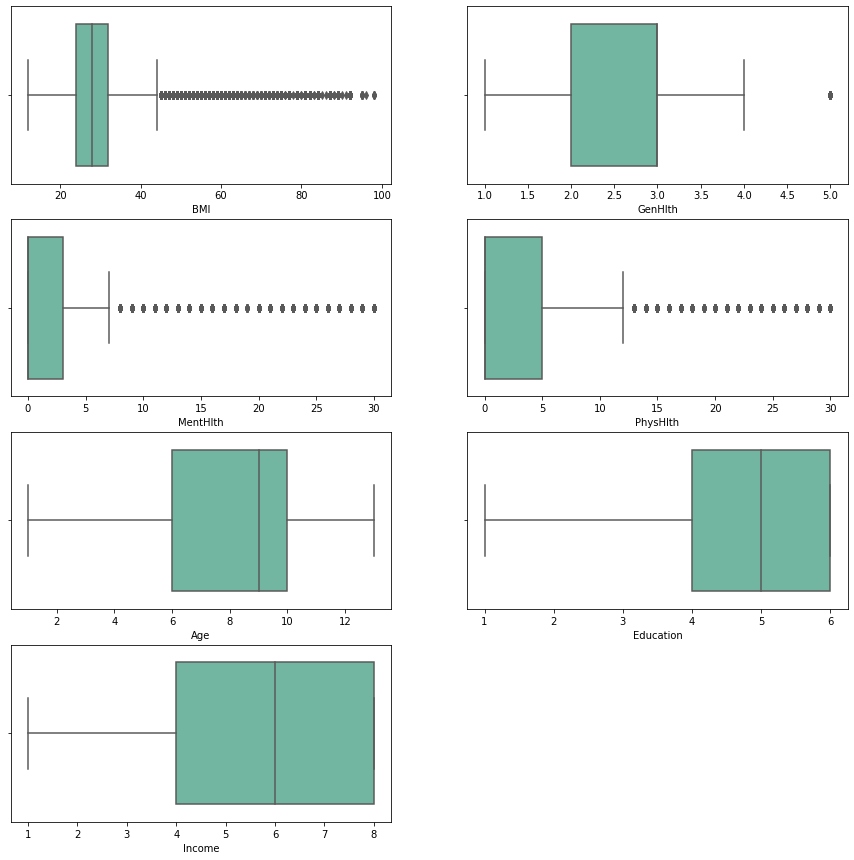

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = diabetes ,palette='Set2')
plt.show()

Podemos observar la presencia de algunos outliers en las categorias de MentHlth; PhysHlth, GenHlth y (principalmente) BMI (IMC). No obstante, su aparicion no justifica la depuracion de esos datos

Finalmente revisamos los valores unicos de cada Categoria

In [ ]:
unique_values = {}
for col in diabetes.columns:
    unique_values[col] = diabetes[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
HvyAlcoholConsump,2
GenHlth,5


Observamos que para las categorias binarias solo tenemos 2 valores y en las multivariadas, tenemos la cantidad de valores definidos acorde a cada categoria.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import math

Primero procedemos a balancear nuestro dataset

In [ ]:
X=diabetes.drop("Diabetes_binary",axis=1)
Y=diabetes["Diabetes_binary"]

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [ ]:
y_sm.shape , x_sm.shape

((68846,), (68846, 15))

## Busqueda de Variables con correlacion relevante

Volvemos a crear un heatmap luego de modificado y balanceado el dataset, y apreciamos como han cambiado un poco los valores. Podemos observar que tanto la percepcion del individuo en su salud general (GenHlth con 0.26); presencia de hipertension arterial (HighBP con 0.25), Indice de Masa Corporal y Dificultad al Caminar (BMI y DiffWalk con 0.20/0.19 respectivamente), Hipercolesterolemia (HighChol con 0.19) y la Edad con antecedente de infarto de miocardio (Age y HeartDiseaseorAttack con 0.18/0.16 respectivamente) serian las variables con correlacion positiva mas relevantes. Por otro lado el Ingreso (Income con -0.12); Educacion (Education con -0.09) y Actividad Fisica (PhysActivity con -0.09) serian la variables con correlacion negativa mas relevante.

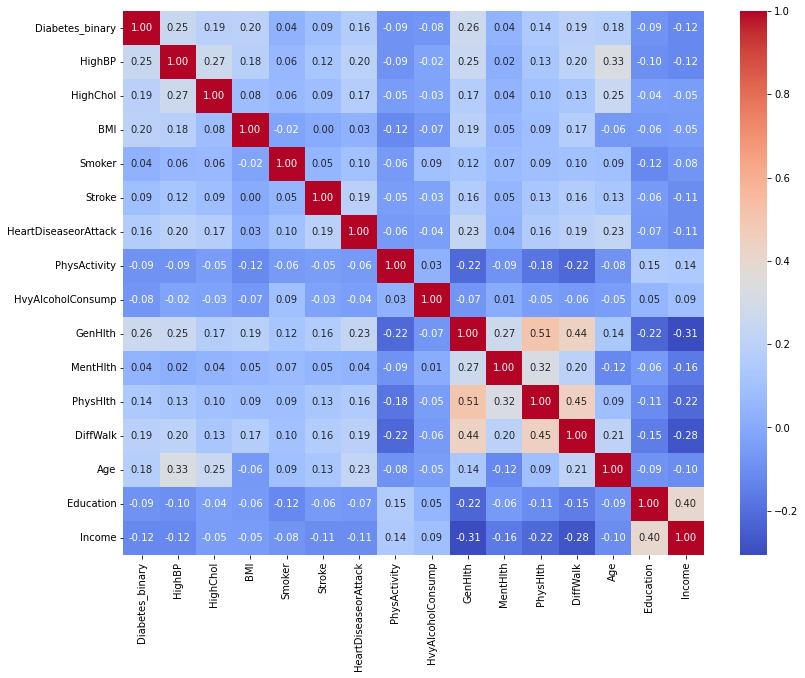

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(diabetes.corr(),annot=True, fmt = ".2f", cmap = "coolwarm");

El siguiente grafico se realiza puramente para determinar de manera alternativa al Heatmap, la correlacion de las variables con la presencia de diabetes.

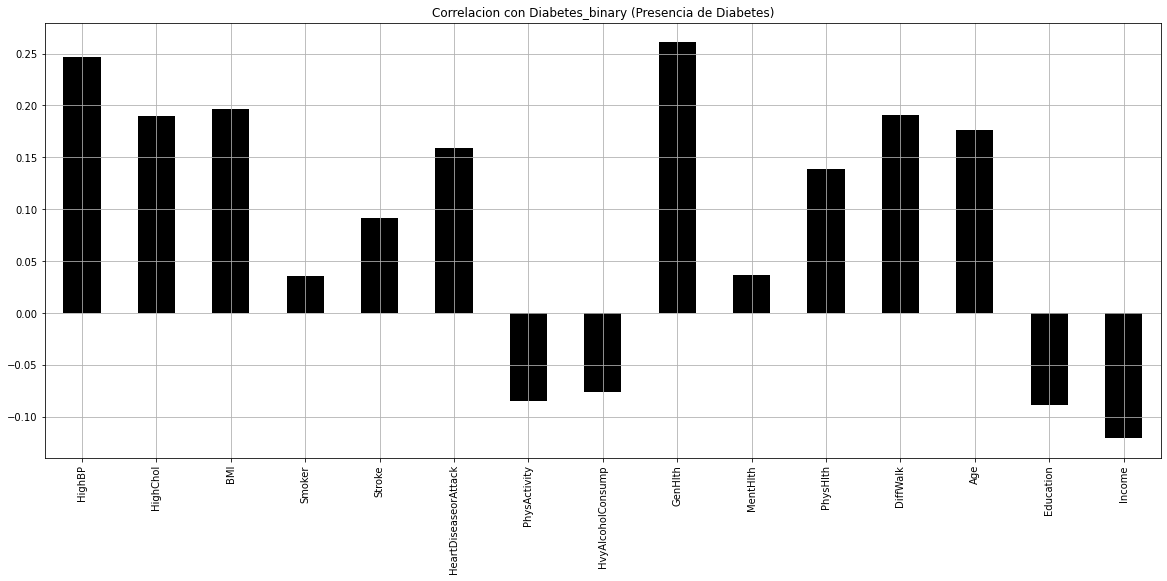

In [ ]:
diabetes.drop('Diabetes_binary', axis=1).corrwith(diabetes.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlacion con Diabetes_binary (Presencia de Diabetes)",color="Black");

## **Analisis de Factores de Riesgo**

## Hipertension (Y relacion con Colesterol)

Comenzamos con el analisis de las variables involucradas evidenciadas en los graficos anteriores.

La primera de ellas, Hipertension arterial (HighBP). Utilizamos un replace para cambiar el valor de 0 y 1 en el conteo de Diabetes e Hipertension para que tengamos la leyenda "Diabetico/No diabetico - Hipertenso/Normotenso", puramente para que la lectura sea mas sencilla.

Realizando un conteo y multiplicacion porcentual, podemos evidenciar que el 75% de los diabeticos tienen Hipertension Arterial, mientras que los No Diabeticos solamente un 42% la presentan.

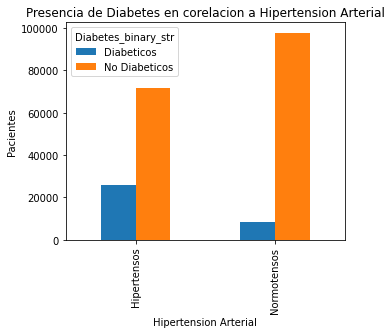

Diabetes_binary_str  HighBP_str 
Diabeticos           Hipertensos    75.124190
                     Normotensos    24.875810
No Diabeticos        Normotensos    57.764922
                     Hipertensos    42.235078
Name: HighBP_str, dtype: float64

In [ ]:
diabetes["Diabetes_binary_str"]= diabetes["Diabetes_binary"].replace({0:"No Diabeticos",1:"Diabeticos"})
diabetes["HighBP_str"]= diabetes["HighBP"].replace({0:"Normotensos",1:"Hipertensos"})
pd.crosstab(diabetes.HighBP_str,diabetes.Diabetes_binary_str)
pd.crosstab(diabetes.HighBP_str,diabetes.Diabetes_binary_str).plot(kind="bar",figsize=(5,4))

plt.title('Presencia de Diabetes en corelacion a Hipertension Arterial')
plt.xlabel("Hipertension Arterial")
plt.ylabel('Pacientes')
plt.show()

(diabetes.groupby("Diabetes_binary_str")["HighBP_str"].value_counts()/diabetes.groupby("Diabetes_binary_str")["HighBP_str"].count())*100

En el siguiente grafico unificamos las variables Colesterol alto (HighChol) y Hipertensionarterial (HighBP) para evidenciar el conjunto de las mismas y como afecta a la presencia o no de diabetes (Nuevamente, modificamos los "0" y "1" por las leyendas correspondientes para su mejor comprension). Con este grafico observamos que ambas variables en conjunto, cuando estan presentes, aumentan la probabilidad de aparicion de diabetes (Hipertensos con Hipercolesterolemia tienen un 31% de prevalencia de diabetes, mientras que Normotensos con Colesterol normal unicamente un 6%)

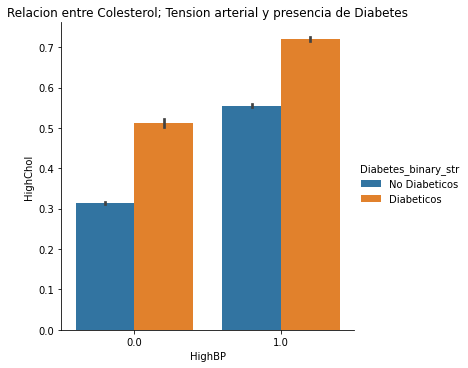

HighBP_str   HighChol_str         Diabetes_binary_str
Hipertensos  Colesterol Normal    No Diabeticos          81.470859
                                  Diabeticos             18.529141
             Hipercolesterolemia  No Diabeticos          68.045022
                                  Diabeticos             31.954978
Normotensos  Colesterol Normal    No Diabeticos          94.134815
                                  Diabeticos              5.865185
             Hipercolesterolemia  No Diabeticos          87.495007
                                  Diabeticos             12.504993
dtype: float64

In [ ]:
diabetes["HighChol_str"]= diabetes["HighChol"].replace({0:"Colesterol Normal",1:"Hipercolesterolemia"})
sns.catplot(x="HighBP" , y ="HighChol" , data = diabetes , hue="Diabetes_binary_str" , kind="bar" );
plt.title("Relacion entre Colesterol; Tension arterial y presencia de Diabetes")
plt.show()

(diabetes.groupby(["HighBP_str" , "HighChol_str"])["Diabetes_binary_str"].value_counts()/diabetes.groupby(["HighBP_str" , "HighChol_str"])["Diabetes_binary"].count())*100

## Edad

A continuacion, nos interesa evaluar la relacion entre la Edad y la prevalencia de diabetes por lo que graficamos la misma en relacion a distintos rangos etarios.

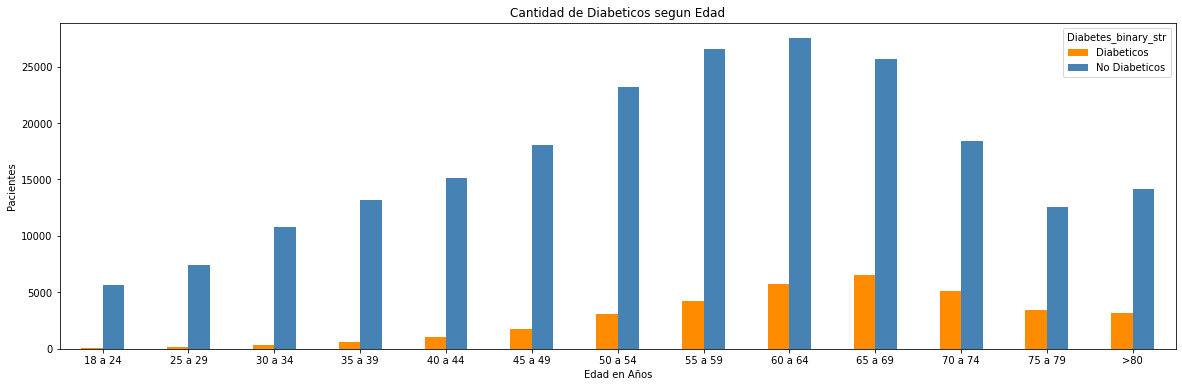

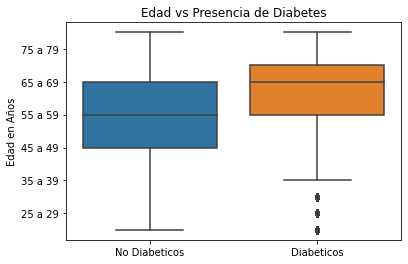

In [ ]:
diabetes["Diabetes_binary_str"]= diabetes["Diabetes_binary"].replace({0:"No Diabeticos",1:"Diabeticos"})

diabetes2["Diabetes_binary_str"]= diabetes2["Diabetes_binary"].replace({0:"No Diabeticos",1:"Diabeticos"})
pd.crosstab(diabetes2.Age,diabetes2.Diabetes_binary_str).plot(kind="bar",figsize=(20,6), color=['darkorange', 'steelblue'])
plt.title('Cantidad de Diabeticos segun Edad')
plt.xlabel('Edad en Años')
plt.xticks(rotation=0)
plt.ylabel('Pacientes')
plt.show()

sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = diabetes)
plt.yticks([2, 4, 6, 8, 10, 12], ['25 a 29', '35 a 39', '45 a 49', '55 a 59', '65 a 69', '75 a 79'])
plt.ylabel ('Edad en Años')
plt.xlabel ('')
plt.title('Edad vs Presencia de Diabetes')
plt.show()

Podemos observar con lo visto arriba que a mayor edad, mayor cantidad de pacientes diabeticos, por lo tanto la mediana de la edad de los pacientes diabeticos es mayor que la de los pacientes no diabeticos.

## BMI

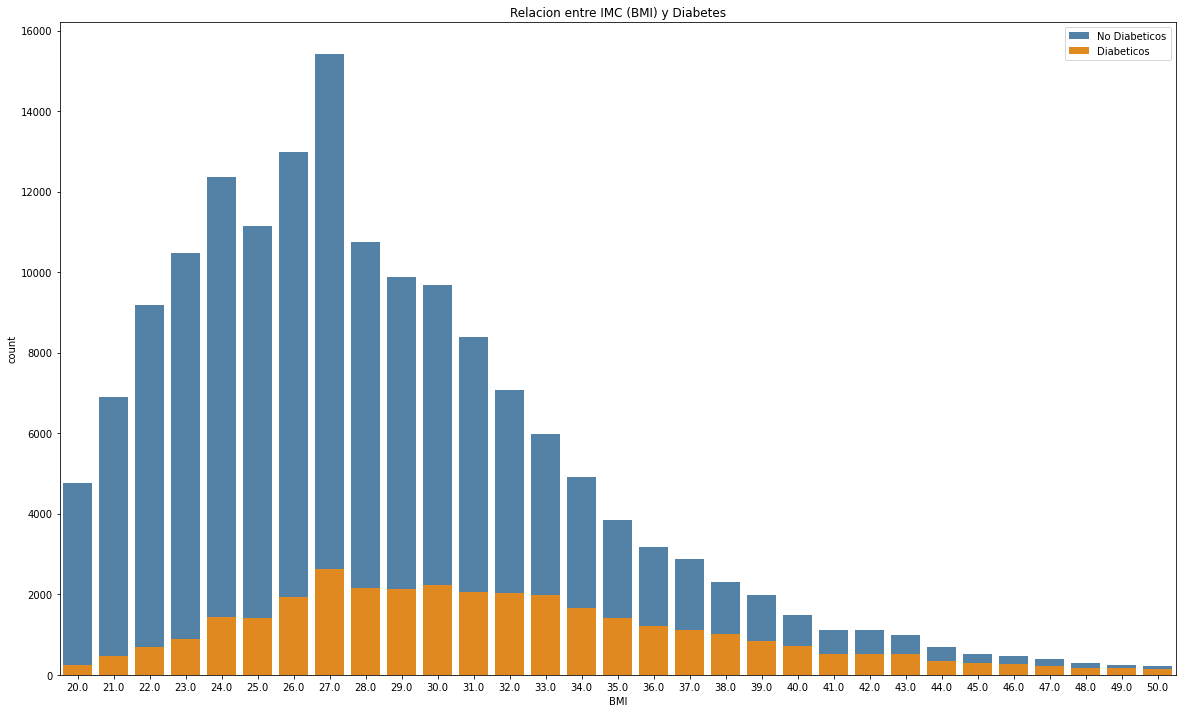

In [ ]:
BMI_2 = diabetes.iloc[np.where((diabetes["BMI"]>19)&(diabetes["BMI"]<=50))]
BMI_2 = pd.DataFrame(BMI_2)
warnings.filterwarnings('ignore')
plt.figure(figsize=(20, 12))
sns.countplot(BMI_2.BMI[diabetes.Diabetes_binary == 0], color="steelblue", label="No Diabeticos")
sns.countplot(BMI_2.BMI[diabetes.Diabetes_binary == 1], color="darkorange", label="Diabeticos")
plt.title("Relacion entre IMC (BMI) y Diabetes")

plt.legend();

Finalmente, creamos un grafico dividiendo la presencia de diabetes con el Indice de masa corporal (BMI). No obstante, al presentar valores maximos y minimos muy altos (con un numero muy pequeño de pacientes que presentaran esos valores extremos) el grafico se volvia poco practico y dificil de leer. Es por esto que se limito el eje de las abscisas a los valores de IMC entre 19 y 50. Podemos observar como la proporcion de pacientes con diabetes aumenta significativamente a medida que el IMC aumenta.

## Percepción de Salud general

Utilizando el manual provisto en las encuestas del CDC, creamos el siguiente grafico representando la percepcion de salud general de los individuos y la prevalencia de diabetes.

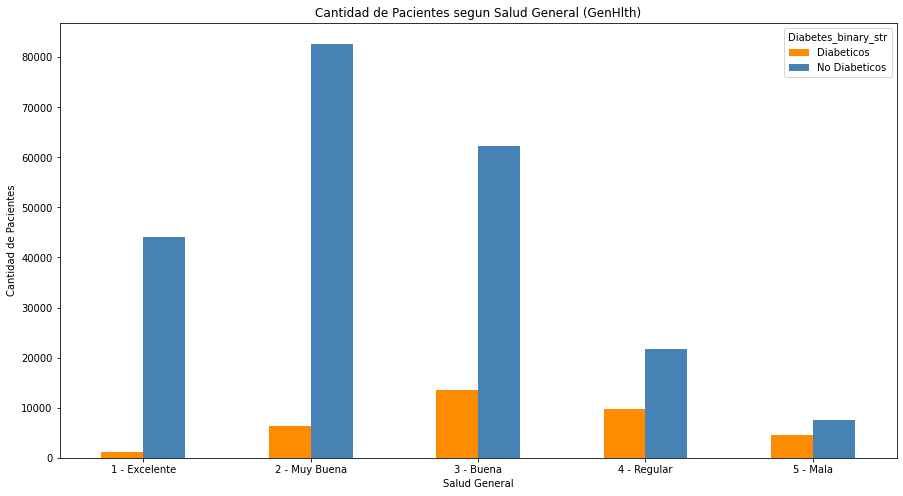

In [ ]:
pd.crosstab(diabetes2.GenHlth,diabetes2.Diabetes_binary_str).plot(kind="bar",figsize=(15,8),color=['darkorange', 'steelblue' ])
plt.title('Cantidad de Pacientes segun Salud General (GenHlth)')
plt.xlabel('Salud General')
plt.xticks(rotation=0)
plt.ylabel('Cantidad de Pacientes')
plt.show()

Podemos observar que la mayoria de los pacientes considera gozar de una salud general Buena, Muy Buena o Excelente. Por otro lado, la prevalencia de diabetes disminuye a medida que mejora la percepcion de la salud general del individuo (sector izquierdo del grafico), y se mantiene proporcionalmente elevada en los pacientes con percepcion de salud mala o regular.

## Dificultad al Caminar

Text(0.5, 0, 'Dificultad al Caminar')

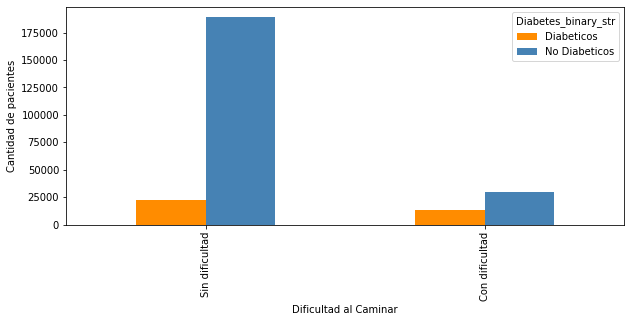

In [ ]:
diabetes.Diabetes_binary_str.head()
pd.crosstab(diabetes2.DiffWalk,diabetes2.Diabetes_binary_str).plot(kind="bar",figsize=(10,4),color=['darkorange', 'steelblue' ])
plt.xticks([0,1], ['Sin dificultad','Con dificultad'])
plt.ylabel('Cantidad de pacientes')
plt.xlabel('Dificultad al Caminar')

#Dificultad al caminar, Enfermedad Cardiaca y de Positivos: Actividad fisica.

Notamos que en los pacientes con dificultad al caminar la cantidad de gente diabética y no diabética es muy similar, mientras que al no tener complicaciones para caminar, la gente sin diabetes se dispara.

## Antecedentes Cardiacos (y asociacion con Edad)

Text(0.5, 0, 'Antecedente de enfermedad Cardiaca')

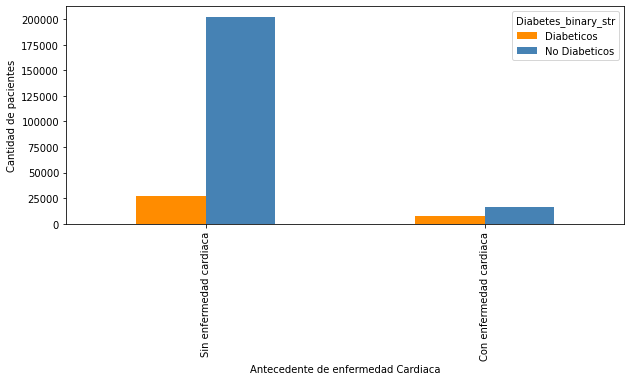

In [ ]:
pd.crosstab(diabetes2.HeartDiseaseorAttack,diabetes2.Diabetes_binary_str).plot(kind="bar",figsize=(10,4),color=['darkorange', 'steelblue' ])
plt.xticks([0,1], ['Sin enfermedad cardiaca','Con enfermedad cardiaca'])
plt.ylabel('Cantidad de pacientes')
plt.xlabel('Antecedente de enfermedad Cardiaca')

Al igual que con la variable anterior, los pacientes con enfermedades cardiacas presentan una presencia muy similar de pacientes con diabetes versus los sin diabetes.

<AxesSubplot:xlabel='Age,HeartDiseaseorAttack_str,Diabetes_binary_str'>

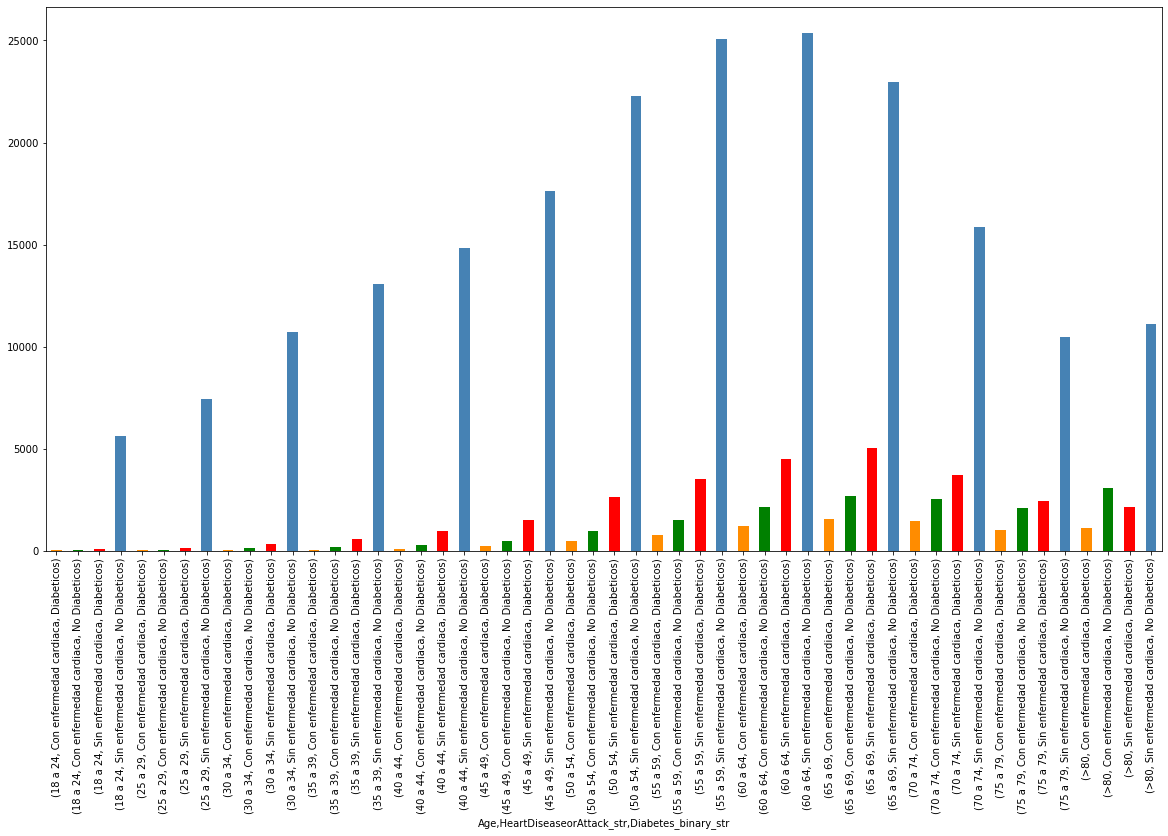

In [ ]:
diabetes2["HeartDiseaseorAttack_str"]=diabetes2["HeartDiseaseorAttack"].replace({0:"Sin enfermedad cardiaca", 1:"Con enfermedad cardiaca"})
diabetes2.groupby(["Age","HeartDiseaseorAttack_str","Diabetes_binary_str"])["Diabetes_binary_str"].count().plot(kind="bar",figsize=(20,10),color=['darkorange', 'green','red','steelblue'])



Se genera el gráfico según edad, enfermedad cardiaca y presencia de diabetes para tener otra noción de esta variable. Podemos ver que según edades de los pacientes la mayor cantidad de diabéticos con enfermedades cardiacas se encuentra desde los 55 en adelante.

## **Analisis de Factores Protectores**

## Actividad Fisica

Continuamos con el EDA, abordando ahora los factores protectores (aquellos que su presencia se asocia inversamente con la prevalencia de diabetes en el paciente).

Text(0.5, 0, 'Actividad Fisica Habitual')

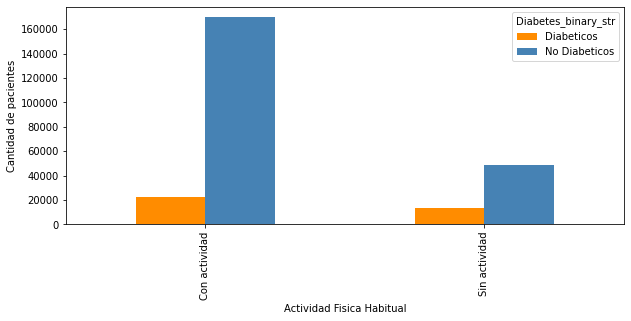

In [ ]:
diabetes2["PhysActivity_str"]=diabetes2["PhysActivity"].replace({0:"Sin actividad", 1:"Con actividad"})
pd.crosstab(diabetes2.PhysActivity_str,diabetes2.Diabetes_binary_str).plot(kind="bar",figsize=(10,4),color=['darkorange', 'steelblue' ])
plt.ylabel('Cantidad de pacientes')
plt.xlabel('Actividad Fisica Habitual')

Al graficar los pacientes con habitos de practica de actividad fisica semanal, notamos que al no tener buenas practicas de salud, en este caso actividad fisica, la proporción de pacientes con diabetes aumenta proporcionalmente.

## Ingresos y Educacion

([<matplotlib.axis.XTick at 0x7fbc0bee1370>,
 [Text(0, 0, ''),
  Text(2, 0, '15,000'),
  Text(4, 0, '25,000'),
  Text(6, 0, '50,000'),
  Text(8, 0, '>U$D75,000')])

<Figure size 1440x1440 with 0 Axes>

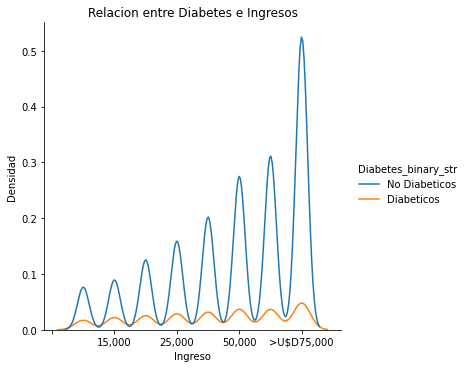

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=diabetes, x="Income", hue="Diabetes_binary_str", kind="kde")
plt.title("Relacion entre Diabetes e Ingresos")
plt.xlabel ('Ingreso')
plt.ylabel ('Densidad')
plt.xticks([0, 2, 4, 6, 8], ['', '15,000', '25,000', '50,000', '>U$D75,000'])

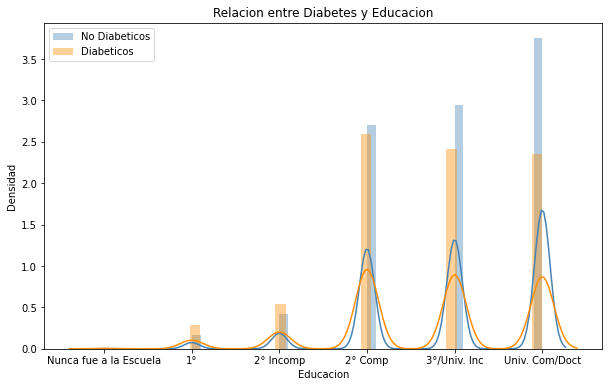

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(diabetes.Education[diabetes.Diabetes_binary == 0], color="Steelblue", label="No Diabeticos" )
sns.distplot(diabetes.Education[diabetes.Diabetes_binary == 1], color="Darkorange", label="Diabeticos" )
plt.title("Relacion entre Diabetes y Educacion")
plt.ylabel('Densidad')
plt.xlabel('Educacion')
plt.xticks([1, 2, 3, 4, 5, 6], ['Nunca fue a la Escuela', '1°', '2° Incomp', '2° Comp', '3°/Univ. Inc', 'Univ. Com/Doct'])
plt.legend()

Podemos observar que a mayor ingreso y mayor nivel educativo, la presencia de pacientes sanos (No Diabeticos) aumenta, mientras que los Diabeticos se mantiene relativamente estable

# **Recomendaciones con base en Insights observados.**

En base a los Insights generados, podemos llegar a diferentes conclusiones que nos ayudaran a entender las causas de la enfermedad y las variables que nos indican su posible aparición o probabilidad de ocurrencia. Dentro de las variables que generan una mayor correlación con la enfermedad podemos establecer dos parámetros, el primero nos indica que ante mayor presencia de una variable encontraremos una mayor predisposición a padecer la enfermedad y el segundo donde ante menor presencia de una variable también aumentaran las posibilidades de dicho padecimiento. Dentro de aquellas variables con correlación positiva (mientras mayor, más probabilidades de enfermedad) podemos observar con mayor presencia la percepción del individuo en su salud general, presencia de hipertensión arterial, índice de masa corporal y dificultad al caminar, hipercolesterolemia y la edad con antecedente de infarto de miocardio. Por otro lado, el Ingreso, la educación y la realización de actividad física serian las variables con correlación negativa más relevante (mientras menor, menos probabilidades de enfermedad). 

Comenzaremos con las recomendaciones acerca de los insights generados gracias a la profundidad en este análisis de variables.

Podemos encontrar que tomando la hipertensión arterial y realizando un conteo y multiplicación porcentual, podemos evidenciar que el 75% de los diabéticos tienen hipertensión arterial, mientras que los no-diabéticos solamente la presentan en un 37%. Continuando con el análisis de hipertensión arterial, al realizar una comparación con el índice de colesterol alto podemos observar que al presentarse ambas en conjunto aumentan mucho la probabilidad de aparición de diabetes (hipertensos con hipercolesterolemia tienen un 29% de prevalencia de diabetes, mientras que normotensos con colesterol normal únicamente un 4%). Como primera recomendación podemos decir que se debería acudir todos los años al médico para realizar los controles de rutina y revisar la presión arterial donde si vemos que es alta, siempre realicemos una comparación con nuestros niveles de colesterol, ya que si son altos estamos en presencia de un patrón que se repite dentro de los pacientes con diabetes y deberíamos realizarnos los estudios correspondientes para su detección.

Si ahora tomamos otra variable con correlación positiva donde vemos que a mayor edad, hay mayor cantidad de pacientes diabéticos, (es decir, su mediana se encuentra entre 55 y 69) se recomienda aumentar la cantidad de controles médicos rutinarios dado que no solo el riesgo de contraer la enfermedad es mayor, sino que también en este rango etario se encuentran la mayoría de los pacientes diabéticos con enfermedades cardiacas (lógicamente también recomendamos un aumento en los controles médicos en el caso de tener cualquier enfermedad cardiaca sin importar la edad). 

Analizando la variable del Indice de masa corporal (IMC) podemos comprender que a medida que el IMC es mayor, la proporción de pacientes con diabetes aumenta, por lo que recomendamos educarnos para poder tener los conocimientos necesarios que permitan mantener una dieta sana y realizar ejercicio regularmente para poder tener un IMC dentro de los parámetros normales. Esta recomendación se relaciona directamente con las variables negativas, vemos un mayor porcentaje de pacientes diabéticos en aquellos que no realizan actividad física o tienen la educación necesaria para llevar una vida saludable. 

A modo de conclusión de estas recomendaciones, si bien entendemos que la cuestión de los ingresos ayuda a llevar una vida sana, no es una variable que influya en la cantidad de pacientes con diabetes, por lo que recomendamos que siempre se busque la manera de mantener una vida saludable sin importar el ingreso económico. No debemos olvidar que la prevalencia de diabetes disminuye a medida que mejora la percepcion de la salud general del individuo y se mantiene proporcionalmente elevada en los pacientes con percepcion de salud mala o regular.



# **Feature Selection y Modelos de Clasificacion**


In [ ]:
columnas = ["Diabetes_binary_str", "HighBP_str", "HighChol_str"]
diabetes.drop(columnas , axis= 1 ,inplace=True)

Como metodo de Feature Selection, elegimos el modelo supervisado de clasificacion binaria con regresion logistica para nuestro dataset.

In [ ]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

In [ ]:
y_pred=lg.predict(X_test)
print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8153
Test set score: 0.8114


In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83     10254
         1.0       0.89      0.72      0.79     10400

    accuracy                           0.81     20654
   macro avg       0.82      0.81      0.81     20654
weighted avg       0.82      0.81      0.81     20654



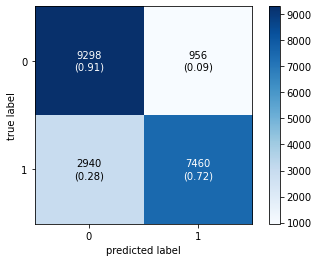

In [ ]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Viendo la matriz de confusion de nuestro modelo, podemos observar que nuestro modelo tiene VP 7484; VN 9288; FP 966 y FN 2916

La Exactitud (Accurancy ; (VP+VN)/(VP+FP+FN+VN) * 100) es 81%; la Precisión (PPR ; VP/(VP+FP)) es 0.8856 (89%); la Sensibilidad (Recall ; VP/VP+FP) es 0.719 (72%), la Especificidad (VN/VN+FP) es 0.905 (91%).

Por otro lado, el F1-Score es 0.79

La Sensibilidad de nuestro modelo determina que tenemos un 72% de probabilidades de que nuestro modelo determine correctamente que un paciente es diabetico y por otro lado la especificidad nos demuestra que nuestro modelo tiene una probabilidad del 91% de descartar correctamente la diabetes en un paciente sano.

Teniendo una considerable Sensibilidad y Presicion, podemos inferir que nuestro modelo es relativamente confiable

Siendo un modelo que aplica a pacientes y personas vivas, si bien sobrediagnosticar es problematico porque amenaza con sobrecargar el sistema de salud y realizar un uso innecesario de los recuros, se debe priorizar en trabajar para mejorar el modelo con el fin de disminuir los falsos negativos (considerando los riesgos de vida y comorbilidades asociadas de subdiagnosticar a pacientes enfermos). En lineas generales y terminologia apropiada, se debe trabajar en mejorar la sensibilidad del modelo, para poder maximizar el alcance del modelo a todos los pacientes diabeticos, evitando la falta de tratamiento a aquellos pacientes que lo requieran (y desconozcan)

In [ ]:
ResultadosModelos = pd.DataFrame(columns=['Modelo', 'Training Score', 'Test Score', 'Accuracy', 'F1-Score', 'Precision','Sensibilidad','Especificidad'])
ResultadosModelos = ResultadosModelos.append({'Modelo': 'LogisticRegression', 'Training Score':'0.8153', 'Test Score':'0.8114', 'Accuracy':'81%','F1-Score':'0.79','Precision':'0.88','Sensibilidad':'0.72','Especificidad':'0.91'}, ignore_index=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ['l1','l2'], 'C': np.logspace(-3,3,7), 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

In [ ]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10)                     

In [ ]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
print("\n The best score across ALL searched params:\n",clf.best_score_)
print("\n The best parameters across ALL searched params:\n",clf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=100.0, solver='newton-cg')

 The best score across ALL searched params:
 0.8153636926446923

 The best parameters across ALL searched params:
 {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
lg = LogisticRegression(penalty='l2', C=100.0, solver='newton-cg', max_iter = 1500)
lg.fit(X_train , Y_train)
y_pred=lg.predict(X_test)
print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))
matrix = classification_report(Y_test,y_pred )
print(matrix)

Training set score: 0.8153
Test set score: 0.8116
              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83     10254
         1.0       0.89      0.72      0.79     10400

    accuracy                           0.81     20654
   macro avg       0.82      0.81      0.81     20654
weighted avg       0.82      0.81      0.81     20654



Con el Gridsearch mejoramos los parametros y aumentamos el Score del Modelo

In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'LogisticRegression Gridsearch', 'Training Score':'0.8153', 'Test Score':'0.8116', 'Accuracy':'81%','F1-Score':'0.79','Precision':'0.88','Sensibilidad':'0.72','Especificidad':'0.91'}, ignore_index=True)

# **Modelos Alternativos**

# Arbol de Decisiones

In [ ]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)

DecisionTreeClassifier(max_depth=12)

In [ ]:
y_pred=dt.predict(X_test)
print('Score Entrenamiento: {:.4f}'.format(dt.score(X_train, Y_train)))
print('Score Prueba: {:.4f}'.format(dt.score(X_test, Y_test)))

Score Entrenamiento: 0.8420
Score Prueba: 0.8191


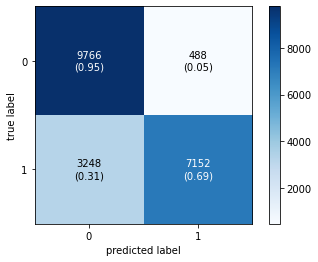

In [ ]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84     10254
         1.0       0.94      0.69      0.79     10400

    accuracy                           0.82     20654
   macro avg       0.84      0.82      0.82     20654
weighted avg       0.84      0.82      0.82     20654



Viendo la matriz de confusion de este modelo, podemos observar que tiene VP 7158; VN 9765; FP 966 y FN 3242

La Exactitud (Accurancy) es 82%; la Precisión es 94%; la Sensibilidad (Recall) es 69%, la Especificidad es 95%.

Por otro lado el F1-Score es 0.79

Si bien la Accurancy de este modelo es mejor que el de regresion logistica que elegimos, la Sensibilidad es Menor (69% vs 72%) y la idea es detectar la mayor cantida de casos de pacientes diabeticos posibles, por lo que decidimos descartar este modelo.

In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'DecisionTree', 'Training Score':'0.8420', 'Test Score':'0.8191', 'Accuracy':'82%','F1-Score':'0.79','Precision':'0.94','Sensibilidad':'0.69','Especificidad':'0.95'}, ignore_index=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.score(X_test, Y_test)

0.8231335334559892

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search_cv.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search_cv.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search_cv.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(max_leaf_nodes=92, random_state=42)

 The best score across ALL searched params:
 0.8250124501992032

 The best parameters across ALL searched params:
 {'max_leaf_nodes': 92, 'min_samples_split': 2}


Nuevamente, el Gridsearch nos arroja mejores parametros que los iniciales

In [ ]:
dt = DecisionTreeClassifier(max_leaf_nodes=92, random_state=42, min_samples_split=2, max_depth= 12)
dt.fit(X_train , Y_train)
y_pred=dt.predict(X_test)
print('Score Entrenamiento: {:.4f}'.format(dt.score(X_train, Y_train)))
print('Score Prueba: {:.4f}'.format(dt.score(X_test, Y_test)))
matrix = classification_report(Y_test,y_pred )
print(matrix)

Score Entrenamiento: 0.8317
Score Prueba: 0.8227
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84     10254
         1.0       0.91      0.72      0.80     10400

    accuracy                           0.82     20654
   macro avg       0.84      0.82      0.82     20654
weighted avg       0.84      0.82      0.82     20654



In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'DecisionTree Gridsearch', 'Training Score':'0.8317', 'Test Score':'0.8227', 'Accuracy':'82%','F1-Score':'0.80','Precision':'0.91','Sensibilidad':'0.72','Especificidad':'0.93'}, ignore_index=True)

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred=knn.predict(X_test)
print('Score Entrenamiento: {:.4f}'.format(knn.score(X_train, Y_train)))
print('Score Prueba: {:.4f}'.format(knn.score(X_test, Y_test)))

Score Entrenamiento: 0.8075
Score Prueba: 0.7631


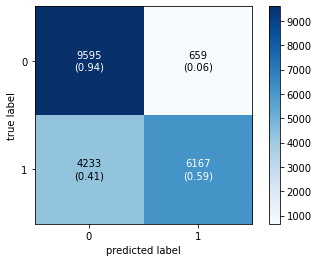

In [ ]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.69      0.94      0.80     10254
         1.0       0.90      0.59      0.72     10400

    accuracy                           0.76     20654
   macro avg       0.80      0.76      0.76     20654
weighted avg       0.80      0.76      0.76     20654



Viendo la matriz de confusion de este modelo, podemos observar que tiene VP 6167; VN 9595; FP 659 y FN 4233

La Exactitud (Accurancy) es 76%; la Precisión es 90%; la Sensibilidad (Recall) es 59%, la Especificidad es 94%.

Por otro lado el F1-Score es 0.72

Por las mismas razones que el modelo con arbol de decisiones (Sensibilidad Menor) descartamos tambien este modelo.

In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'KNN', 'Training Score':'0.8075', 'Test Score':'0.7631', 'Accuracy':'76%','F1-Score':'0.72','Precision':'0.90','Sensibilidad':'0.59','Especificidad':'0.94'}, ignore_index=True)

# Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [ ]:
y_pred=rf.predict(X_test)
print('Score Entrenamiento: {:.4f}'.format(rf.score(X_train, Y_train)))
print('Score Prueba: {:.4f}'.format(rf.score(X_test, Y_test)))

Score Entrenamiento: 0.8484
Score Prueba: 0.8300


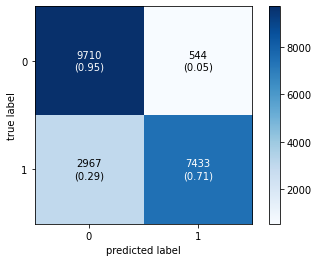

In [ ]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.77      0.95      0.85     10254
         1.0       0.93      0.71      0.81     10400

    accuracy                           0.83     20654
   macro avg       0.85      0.83      0.83     20654
weighted avg       0.85      0.83      0.83     20654



Viendo la matriz de confusion de este modelo, podemos observar que tiene VP 7433; VN 9710; FP 544 y FN 2967

La Exactitud (Accurancy) es 83%; la Precisión es 93%; la Sensibilidad (Recall) es 71%, la Especificidad es 95%.

Por otro lado el F1-Score es 0.81

Por las mismas razones que los modelos anteriores (Sensibilidad Menor) descartamos tambien este modelo.

In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'Random Forest', 'Training Score':'0.8484', 'Test Score':'0.8300', 'Accuracy':'83%','F1-Score':'0.81','Precision':'0.93','Sensibilidad':'0.71','Especificidad':'0.95'}, ignore_index=True)

In [ ]:
#Se desactivan estas lineas de codigo para que el Runtime del modelo no sea excesivo para el lector
#from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestRegressor 
#parameters = {'n_estimators': [5,10,25,50,100,200,500], 'max_features': [5,6,7,8], 'max_depth': [2,3,4,5,6,7,8,9,10,11,12], 'random_state': [42]} #'penalty': ['l1', 'l2']
#clf= RandomForestRegressor()
#clf_gs = GridSearchCV(clf, parameters)
#clf_gs.fit(X_train, Y_train)

In [ ]:
#rf.score(X_test, Y_test)

In [ ]:
#clf_gs.score(X_test, Y_test)

In [ ]:
#print(" Results from Grid Search " )
#print("\n The best estimator across ALL searched params:\n",clf_gs.best_estimator_)
#print("\n The best score across ALL searched params:\n",clf_gs.best_score_)
#print("\n The best parameters across ALL searched params:\n",clf_gs.best_params_)

Con el Grid Search en el rango de parametros elegidos no obtenemos mejor puntaje que los parametros previos, por lo que no se modifica el set original

# SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)
print('Score Entrenamiento: {:.4f}'.format(clf.score(X_train, Y_train)))
print('Score Prueba: {:.4f}'.format(clf.score(X_test, Y_test)))

Score Entrenamiento: 0.8391
Score Prueba: 0.8295


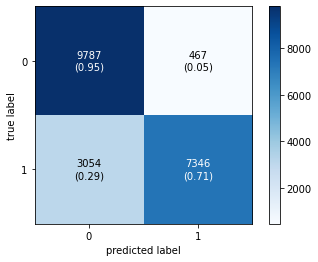

In [ ]:
cm1 = confusion_matrix(Y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85     10254
         1.0       0.94      0.71      0.81     10400

    accuracy                           0.83     20654
   macro avg       0.85      0.83      0.83     20654
weighted avg       0.85      0.83      0.83     20654



Viendo la matriz de confusion de este modelo, podemos observar que tiene VP 7346; VN 9787; FP 467 y FN 3054

La Exactitud (Accurancy) es 83%; la Precisión es 94%; la Sensibilidad (Recall) es 71%, la Especificidad es 95%.

Por otro lado el F1-Score es 0.81

Este modelo metricas muy similares al anterior, y por los mismos motivos que los anteriores, se descarto.

In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'SVM', 'Training Score':'0.8391', 'Test Score':'0.8295', 'Accuracy':'83%','F1-Score':'0.81','Precision':'0.94','Sensibilidad':'0.71','Especificidad':'0.95'}, ignore_index=True)

In [ ]:
#Se desactivan estas lineas de codigo para que el Runtime del modelo no sea excesivo para el lector
#from sklearn import svm, datasets
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#svc = svm.SVC()
#clf = GridSearchCV(svc, parameters)
#clf.fit(X_train, Y_train)
#GridSearchCV(estimator=SVC(),
#param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
#print(" Results from Grid Search " )
#print("\n The best estimator across ALL searched params:\n",clf.best_estimator_)
#print("\n The best score across ALL searched params:\n",clf.best_score_)
#print("\n The best parameters across ALL searched params:\n",clf.best_params_)

Nuevamente, refinamos los parametros en base al Gridsearch para maximizar la busqueda

In [ ]:
clf = SVC(kernel='rbf', C=10)
clf.fit(X_train, Y_train)
y_pred=clf.predict(X_test)
print('Score Entrenamiento: {:.4f}'.format(clf.score(X_train, Y_train)))
print('Score Prueba: {:.4f}'.format(clf.score(X_test, Y_test)))

Score Entrenamiento: 0.8487
Score Prueba: 0.8336


In [ ]:
matrix = classification_report(Y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85     10254
         1.0       0.95      0.71      0.81     10400

    accuracy                           0.83     20654
   macro avg       0.86      0.83      0.83     20654
weighted avg       0.86      0.83      0.83     20654



In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'SVM Gridsearch', 'Training Score':'0.8487', 'Test Score':'0.8336', 'Accuracy':'83%','F1-Score':'0.81','Precision':'0.95','Sensibilidad':'0.71','Especificidad':'0.96'}, ignore_index=True)

# Evaluando y Comparando Modelos

Finalmente podemos ver la comparativa de todos los modelos hasta el momento

In [ ]:
ResultadosModelos

,Modelo,Training Score,Test Score,Accuracy,F1-Score,Precision,Sensibilidad,Especificidad
0,LogisticRegression,0.8153,0.8114,81%,0.79,0.88,0.72,0.91
1,LogisticRegression Gridsearch,0.8153,0.8116,81%,0.79,0.88,0.72,0.91
2,DecisionTree,0.8420,0.8191,82%,0.79,0.94,0.69,0.95
3,DecisionTree Gridsearch,0.8317,0.8227,82%,0.80,0.91,0.72,0.93
4,KNN,0.8075,0.7631,76%,0.72,0.90,0.59,0.94
5,Random Forest,0.8484,0.8300,83%,0.81,0.93,0.71,0.95
6,SVM,0.8391,0.8295,83%,0.81,0.94,0.71,0.95
7,SVM Gridsearch,0.8487,0.8336,83%,0.81,0.95,0.71,0.96


Luego de comparar modelos, podemos evidenciar que el modelo de **DecisionTree** con los parametros del **Gridsearch** es mejor que el modelo originalmente planteado de Regresion Logistica, dado que tiene mejor Sensibilidad (metrica primordial en un modelo de prediccion orientado a salud) y mantiene niveles altos de especificidad. 

Proseguimos a agregar los datos eliminados previamente al hacer el undersampling para realizar un nuevo testeo, evaluar las metricas del modelo y como se comporta

In [ ]:
#Creamos un nuevo DataFrame llamado DSUF que incluye los valores extraidos del dataset original al realizar undersampling

DSUF = x_sm.join(y_sm,                
                 lsuffix = '_x_sm',
                 rsuffix = '_y_sm')

In [ ]:
#Hacemos un merge del Dataset original con el DSUF eliminando los valores repetidos, para dejar unicamente los valores que habian sido eliminados

DataNew = pd.merge(diabetes, DSUF, how = 'outer', indicator='false')

In [ ]:
#Eliminamos la columna indicadora para que no altere el dataset

DataNew.drop(columns=['false'])

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203647,0.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,6.0,7.0
203648,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,11.0,2.0,4.0
203649,0.0,0.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,2.0
203650,0.0,1.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,5.0,1.0


In [ ]:
dt = DecisionTreeClassifier(max_leaf_nodes=92, random_state=42, min_samples_split=2, max_depth= 12)
dt.fit(X_train , Y_train)
y_pred=dt.predict(X_test)
print('Score Entrenamiento: {:.4f}'.format(dt.score(X_train, Y_train)))
print('Score Prueba: {:.4f}'.format(dt.score(X_test, Y_test)))
matrix = classification_report(Y_test,y_pred )
print(matrix)

Score Entrenamiento: 0.8317
Score Prueba: 0.8227
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84     10254
         1.0       0.91      0.72      0.80     10400

    accuracy                           0.82     20654
   macro avg       0.84      0.82      0.82     20654
weighted avg       0.84      0.82      0.82     20654



In [ ]:
X2_test = DataNew.drop(["Diabetes_binary",'false'],axis=1)
Y2_test = DataNew.loc[:, ['Diabetes_binary']]

In [ ]:
#dt = DecisionTreeClassifier(max_leaf_nodes=92, random_state=42, min_samples_split=2, max_depth= 12)
#dt.fit(X_train , Y_train)
y_pred=dt.predict(X2_test)
print('Score Entrenamiento: {:.4f}'.format(dt.score(X_train, Y_train)))
print('Score Prueba: {:.4f}'.format(dt.score(X2_test, Y2_test)))
matrix = classification_report(Y2_test,y_pred )
print(matrix)

Score Entrenamiento: 0.8317
Score Prueba: 0.1690
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    169229
         1.0       0.17      1.00      0.29     34423

    accuracy                           0.17    203652
   macro avg       0.08      0.50      0.14    203652
weighted avg       0.03      0.17      0.05    203652



Al ver la mala perfomance de nuestro modelo con el nuevo set de datos podemos inferir que la variancia es muy alta porque el modelo es demasiado complejo y esta generando Overfitting

In [ ]:
#Evaluamos los porcentajes de los resultados para poder agregar el parametro Weight_Class al modelo
Y2_test.value_counts(normalize=True)*100

Diabetes_binary
0.0                83.097146
1.0                16.902854
dtype: float64

In [ ]:
weights = {0:0.83097146, 1:0.16902854}
dt = DecisionTreeClassifier(max_leaf_nodes=92, random_state=42, min_samples_split=2, max_depth= 12, class_weight=weights)
dt.fit(X_train , Y_train)
y_pred=dt.predict(X2_test)
print('Score Entrenamiento: {:.4f}'.format(dt.score(X_train, Y_train)))
print('Score Prueba: {:.4f}'.format(dt.score(X2_test, Y2_test)))
matrix = classification_report(Y2_test,y_pred )
print(matrix)

Score Entrenamiento: 0.8111
Score Prueba: 0.1690
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    169229
         1.0       0.17      1.00      0.29     34423

    accuracy                           0.17    203652
   macro avg       0.08      0.50      0.14    203652
weighted avg       0.03      0.17      0.05    203652



# Busqueda de nuevos modelos utiles y Cross Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
model1 = LogisticRegression(penalty='l2', C=100.0, solver='newton-cg', max_iter = 1500)
model2 = GaussianNB()
model3 = MLPClassifier(random_state = 123,max_iter=500)
model4 = SGDClassifier(random_state = 123)
model5 = DecisionTreeClassifier(max_leaf_nodes=92, random_state=123, min_samples_split=2, max_depth= 12)
model6 = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=123)
model7 = GradientBoostingClassifier(random_state = 123)
model8 = LGBMClassifier(random_state = 123)
model9 = XGBClassifier(random_state = 123,use_label_encoder=False)

In [ ]:
X = diabetes.drop(['Diabetes_binary'],axis=1)
Y = diabetes['Diabetes_binary']

In [ ]:
from sklearn.model_selection import cross_val_score

models = [model1,model2,model3,model4,model5,model6,model7,
          model8,model9]


for m in range(len(models)):
    model = models[m]
    scores = cross_val_score(model, X, Y, scoring = 'roc_auc', cv = 5)
    print(f"For no of trees {m+1} - {np.mean(scores)}")

En la busqueda anterior, observamos que el modelo LGBMCClassifier podria ser una alternativa viable para nuestro dataset

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

kfold = 5
skf = StratifiedKFold(n_splits=kfold, shuffle = True)

X1 = np.array(X)
Y1 = np.array(Y)
scores = []

for i, (train_index, test_index) in enumerate(skf.split(X1, Y1)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X1[train_index], X1[test_index]
    Y_train, Y_valid = Y1[train_index], Y1[test_index]
    
    model1 = LogisticRegression(max_iter = 1000, C=1.0,penalty='l2',solver='newton-cg')
    model1.fit(X_train,Y_train)
    Y_pred1 = pd.DataFrame(model1.predict_proba(X_valid))[1].values
    
    model2 = RandomForestClassifier(random_state=123,class_weight="balanced")
    model2.fit(X_train,Y_train)
    Y_pred2 = pd.DataFrame(model2.predict_proba(X_valid))[1].values
    
    model3 = GaussianNB()
    model3.fit(X_train,Y_train)
    Y_pred3 = pd.DataFrame(model3.predict_proba(X_valid))[1].values
    
    Y_pred = 0.2 * Y_pred1 + 0.15 * Y_pred2 + 0.65*Y_pred3
    score = roc_auc_score(Y_valid, Y_pred)
    Y_pred_label = np.where(Y_pred<0.5,0,1)
    #print(classification_report(y_valid,y_pred_label))
    scores.append(score)
    
    print(f'Fold {i + 1}/{kfold} - Score: {score}')   

print(f"Avg scores - {np.mean(scores)}")

# Escalado y PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = diabetes.iloc[:,1:]
y = diabetes["Diabetes_binary"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Ajuste
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
pca.n_components_

In [ ]:
pca.explained_variance_ratio_*100

In [ ]:
from pandas.core.array_algos.putmask import convert_scalar_for_putitemlike
from sklearn.linear_model import LogisticRegression

# Instanciar
lrc = LogisticRegression()

# Entrenar modelo
lrc.fit(X_train_pca, y_train)

# Evaluar
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lrc, X_test_pca,y_test)

In [ ]:
!pip install factor_analyzer

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
# Instanciar objeto
fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='principal')
X_scaled = scaler.fit_transform(X)

# Ajustar modelo
fa.fit(X_scaled)

In [ ]:
(fa.get_eigenvalues()[0]/len(fa.get_eigenvalues()[0])*100)

In [ ]:
fa.get_communalities()*100

Alrededor del 44% de la variabilidad se explica por los 2 factores.

Dada las caracteristicas de nuestro dataset, determinamos que el PCA y el FactorAnalyzer no son metodos apropiados para reducir la dimensionalidad.